In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#torchvision package
import torchvision

In [0]:
trainset = torchvision.datasets.CIFAR10(root = './data',train = True,
                                       download = True, transform = torchvision.transforms.ToTensor())
#transform --> transform the data during creation

0it [00:00, ?it/s]

100%|█████████▉| 170369024/170498071 [00:12<00:00, 17041930.85it/s]

In [0]:
#class labels
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship',' truck' )

In [0]:
type(trainset)

torchvision.datasets.cifar.CIFAR10

In [0]:
#loading the dataset --> DataLoader class (torch.utils.data.DataLoader)
trainloader = torch.utils.data.DataLoader(trainset)

In [0]:
data_iter = iter(trainloader)
type(data_iter)

torch.utils.data.dataloader._DataLoaderIter

In [0]:
#Access the data --> next() method
images,labels = data_iter.next()
print(images.shape)

torch.Size([1, 3, 32, 32])


(1,3,32,32) -->

1 - Batch Size, 

3 - channels in input,

32,32 - shape of individual image 

In [0]:
print(labels.item())

6


In [0]:
classes[labels.item()]

'frog'

In [0]:
#Specifying batch_size, Shuffle & load data in paralell using multiprocessing workers
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True)

data_iter = iter(trainloader)
images,labels = data_iter.next()

In [0]:
print(images.shape)

torch.Size([4, 3, 32, 32])


(4,3,32,32) -->

4 - Batch Size(no. of images loaded), 

3 - channels in input,

32,32 - shape of individual image 

In [0]:
labels

tensor([5, 0, 2, 3])

# Visualize the Data

In [0]:
image_data = images[0]
image_data.shape

torch.Size([3, 32, 32])

In [0]:
#convert to numpy
np_image = image_data.numpy()

In [0]:
np_image.shape

(3, 32, 32)

In [0]:
#transpose
np_image = np.transpose(np_image, (1,2,0))

In [0]:
np_image.shape

(32, 32, 3)

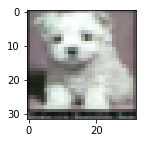

In [0]:
#plotting the image
plt.figure(figsize = (2,2))
plt.imshow(np_image)
plt.show()

In [0]:
print(classes[labels[0].item()])

dog


In [0]:
def image_show(image_data):
  np_image = image_data.numpy()
  np_image = np.transpose(np_image, (1,2,0))
  plt.figure(figsize = (2,2))
  plt.imshow(np_image)
  plt.show()

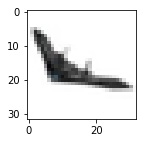

In [0]:
image_show(images[1])

In [0]:
print(classes[labels[1].item()])

airplane


# First Convolution Layer

In [0]:
class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3)  # (no. of input channels, number of output channels, kernel size)
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

In [0]:
cnn = FirstCNN()

In [0]:
out = cnn(images)

In [0]:
print(out.shape)

torch.Size([4, 10, 30, 30])


(4,10,30,30) -->

4 : number of images (batch size)

10 : Channels in output

(30,30)  : Resultant image Size


**Default:**

Padding = (0,0), Stride  = (1,1)

In [0]:
#image after convolution
sample = out[0,0,:,:]
sample.shape

torch.Size([30, 30])

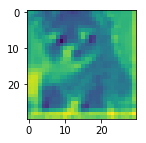

In [0]:
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

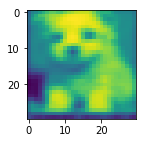

In [0]:
#2nd filter
sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [0]:
#Padding & Stride
#By Default: Padding = (0,0) & Stride = (1,1)

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3, padding = (1,1) )  # Padding = 1,1
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

In [0]:
cnn = FirstCNN()

In [0]:
out = cnn(images)

In [0]:
out.shape

torch.Size([4, 10, 32, 32])

In [0]:
#Stride = 1

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3, padding = (1,1), stride = (1,1) )  # Stride = 1,1
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

  
cnn = FirstCNN()
out = cnn(images)
out.shape

torch.Size([4, 10, 32, 32])

In [0]:
#Stride = 2

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3, padding = (1,1), stride = (2,2) )  # Stride = 2,2
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

  
cnn = FirstCNN()
out = cnn(images)
out.shape

torch.Size([4, 10, 16, 16])

In [0]:
#Stride = 2 without padding

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3, stride = (2,2) )  # Stride = 2,2
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

  
cnn = FirstCNN()
out = cnn(images)
out.shape

torch.Size([4, 10, 15, 15])

# Deep Convolution Networks

In [0]:
class DeepCNN(nn.Module):
  def __init__(self):
    super(DeepCNN,self).__init__()
    self.model = nn.Sequential(nn.Conv2d(3,10,3),
                              nn.Conv2d(10,5,3))
    
  def forward(self,x):
    y = self.model(x)
    return y

### Intuition of Convolution:

Input = 4,3,32,32

1st Convolution Layer --> Kernel = 3,3 & output channels = 10

Default padding = 0, Stride = 1


**output, as a Result of 1st Convolution :** *4,10,30,30*

---

2nd Convolution Layer --> Kernel = (3,3) & output channels = 5

**output, as a Result of 2nd Convolution :** *4,5,28,28*

Default padding = 0, Stride = 1

In [0]:
deep = DeepCNN()
out = deep(images)
print(out.shape)

torch.Size([4, 5, 28, 28])


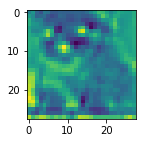

In [0]:
sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [0]:
#Mean Pool or Avg pool
class avg_pool(nn.Module):
  def __init__(self):
    super(avg_pool,self).__init__()
    self.model = nn.Sequential(nn.Conv2d(3,10,3),
                              nn.Conv2d(10,5,3),
                              nn.AvgPool2d(2, stride = 2)) # Kernel size, Stride
    #Stride = 2 --> (2,2)
    
  def forward(self,x):
    y = self.model(x)
    return y

In [0]:
avg = avg_pool()
out = avg(images)
print(out.shape)

torch.Size([4, 5, 14, 14])


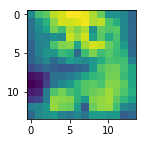

In [0]:
sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [0]:
#Max Pool
class max_pool(nn.Module):
  def __init__(self):
    super(max_pool,self).__init__()
    self.model = nn.Sequential(nn.Conv2d(3,10,3),
                              nn.Conv2d(10,5,3),
                              nn.MaxPool2d(2, stride = 2)) # Kernel size, Stride
    #Stride = 2 --> (2,2)
    
  def forward(self,x):
    y = self.model(x)
    return y

In [0]:
max_p = max_pool()
out = max_p(images)
print(out.shape)

torch.Size([4, 5, 14, 14])


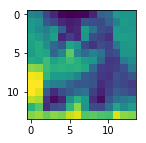

In [0]:
sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

# LeNet

In [0]:
"""
CNN layers:
Input = (4,3,32,32) --> batch size = 4

In General,
Input = (N,3,32,32) --> batch size = N

1st Convolution:
(N,3,32,32) --> (N,6,28,28)   #output channels = 6, kernel = 5, stride = 1
Avg Pool:
(N,6,28,28) --> (N,6,14,14)  # Kernel = 2, stride = 2
2nd Convolution:
(N,6,14,14) --> (N,16,10,10) # kernel = 5
Avg Pool:
(N,16,10,10) --> (N,16,5,5) # Stride = 2, kernel = 2
""";

In [0]:
"""
Dense Layers:
output from CNN Layers --> (N,16,5,5)
Result of flattening --> (N,16*5*5) = (N,400) # N refers to number of images loaded in a batch
Dense Layer 1: 120 Neurons
Dense Layer 2: 84 Neurons
Dense Layer 3: 10 Neurons
""";

In [0]:
#Understanding torch.flatten
x = torch.randn(500,5,10)
x = torch.flatten(x)
print(x.shape)

torch.Size([25000])


In [0]:
#Specifying dimension in torch.flatten
x = torch.randn(500,5,10)
x = torch.flatten(x,1)
print(x.shape)

torch.Size([500, 50])


In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.conv_model = nn.Sequential(nn.Conv2d(3,6,5), # (N,3,32,32) --> (N,6,28,28) 
                                   nn.Tanh(),
                                   nn.AvgPool2d(2, stride = 2), # (N,6,28,28) --> (N,6,14,14)
                                   nn.Conv2d(6,16,5), # (N,6,14,14) --> (N,16,10,10)
                                   nn.Tanh(),
                                   nn.AvgPool2d(2,stride = 2) # (N,16,10,10) --> (N,16,5,5)
                                   )
    
    #Dense Layer
    self.dense_model = nn.Sequential(nn.Linear(400,120),
                                    nn.Tanh(),
                                    nn.Linear(120,84),
                                    nn.Tanh(),
                                    nn.Linear(84,10)
                                    )
    
  def forward(self,x):
    y = self.conv_model(x)
    #flatten the result from Conv model
    y = torch.flatten(y,1) # 1 --> dimension (N,16,5,5)
    y = self.dense_model(y)
    return y

In [0]:
net = LeNet()
out = net(images)

In [0]:
out.shape

torch.Size([4, 10])

In [0]:
print(out)

tensor([[-0.0706, -0.0331, -0.0575,  0.1201, -0.0467,  0.0232, -0.0940, -0.1019,
          0.1207,  0.1284],
        [-0.0606, -0.0048, -0.0519,  0.1297, -0.0333,  0.0513, -0.0632, -0.0944,
          0.1323,  0.1287],
        [-0.0568, -0.0022, -0.0520,  0.1233, -0.0475,  0.0172, -0.0930, -0.1124,
          0.1387,  0.0927],
        [-0.0614, -0.0266, -0.0564,  0.1102, -0.0496,  0.0230, -0.0767, -0.1163,
          0.1333,  0.0985]], grad_fn=<AddmmBackward>)


In [0]:
torch.max(out)

tensor(0.1387, grad_fn=<MaxBackward1>)

In [0]:
#max value across each dimension, parameter --> dim = 1
torch.max(out,dim = 1)

torch.return_types.max(values=tensor([0.1284, 0.1323, 0.1387, 0.1333], grad_fn=<MaxBackward0>), indices=tensor([9, 8, 8, 8]))

In [0]:
max_values , pred_class = torch.max(out,dim = 1)

In [0]:
print(pred_class)

tensor([9, 8, 8, 8])


# Train the LeNet

In [0]:
#define batch size
batch = 256

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.conv_model = nn.Sequential(nn.Conv2d(3,6,5), # (N,3,32,32) --> (N,6,28,28) 
                                   nn.Tanh(),
                                   nn.AvgPool2d(2, stride = 2), # (N,6,28,28) --> (N,6,14,14)
                                   nn.Conv2d(6,16,5), # (N,6,14,14) --> (N,16,10,10)
                                   nn.Tanh(),
                                   nn.AvgPool2d(2,stride = 2) # (N,16,10,10) --> (N,16,5,5)
                                   )
    
    #Dense Layer
    self.dense_model = nn.Sequential(nn.Linear(400,120),
                                    nn.Tanh(),
                                    nn.Linear(120,84),
                                    nn.Tanh(),
                                    nn.Linear(84,10)
                                    )
    
  def forward(self,x):
    y = self.conv_model(x)
    #flatten the result from Conv model
    y = torch.flatten(y,1) # 1 --> dimension (N,16,5,5)
    y = self.dense_model(y)
    return y

In [0]:
#create new train & test data with new batch size
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = torchvision.transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch, shuffle = True)

testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = torchvision.transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size = batch, shuffle = False)
#Setting the testloader with shuffle as False to measure test accuracy

Files already downloaded and verified
Files already downloaded and verified


In [0]:
net = LeNet() 

In [0]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters()) 

In [0]:
def model_evaluation(dataloader): 
  total = 0
  correct = 0
  for data in dataloader:
    image_data,labels = data
    out = net(image_data) 
    max_values,pred_class = torch.max(out,1) 
    total += labels.shape[0] 
    correct += (pred_class == labels).sum().item() 
    accuracy = (100 * correct)/total
  return accuracy

In [0]:
total_epochs = 20

for i in range(total_epochs):
  
  for data in trainloader:
    image_data, labels = data
    
    optimizer.zero_grad() 
    out = net(image_data) #image_data --> input data
    loss = loss_func(out,labels)
    loss.backward()
    optimizer.step()
    
  train_acc = model_evaluation(trainloader) 
  test_acc = model_evaluation(testloader)
  
  print("Epoch :",i," Test Accuracy : ",test_acc," Train Accuracy : ",train_acc)
    

Epoch : 0  Test Accuracy :  36.86  Train Accuracy :  36.714
Epoch : 1  Test Accuracy :  40.89  Train Accuracy :  41.284
Epoch : 2  Test Accuracy :  43.75  Train Accuracy :  43.78
Epoch : 3  Test Accuracy :  46.45  Train Accuracy :  46.688
Epoch : 4  Test Accuracy :  48.09  Train Accuracy :  48.942
Epoch : 5  Test Accuracy :  49.26  Train Accuracy :  50.678
Epoch : 6  Test Accuracy :  50.28  Train Accuracy :  52.078
Epoch : 7  Test Accuracy :  51.4  Train Accuracy :  53.392
Epoch : 8  Test Accuracy :  52.7  Train Accuracy :  54.964
Epoch : 9  Test Accuracy :  53.28  Train Accuracy :  56.052
Epoch : 10  Test Accuracy :  54.2  Train Accuracy :  56.992
Epoch : 11  Test Accuracy :  54.38  Train Accuracy :  57.914
Epoch : 12  Test Accuracy :  54.57  Train Accuracy :  58.728
Epoch : 13  Test Accuracy :  54.77  Train Accuracy :  59.318
Epoch : 14  Test Accuracy :  55.36  Train Accuracy :  60.432
Epoch : 15  Test Accuracy :  54.75  Train Accuracy :  60.214
Epoch : 16  Test Accuracy :  55.83  Tr